In [1]:
# House Price Prediction

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [3]:
# Load dataset
# (Replace with the path to your data file if local)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = pd.read_csv(url, header=None)

In [4]:
# Basic exploration
print(df.head())
print(df.info())
print(df.describe())

        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6  

In [5]:
# Rename columns for readability
columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
df.columns = columns

In [6]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


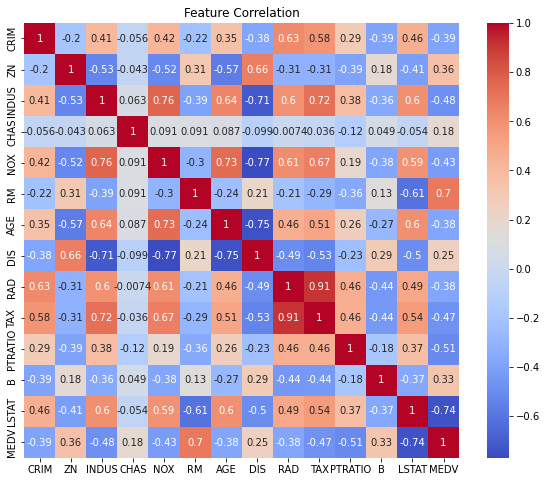

In [7]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", square=True)
plt.title("Feature Correlation")
plt.show()

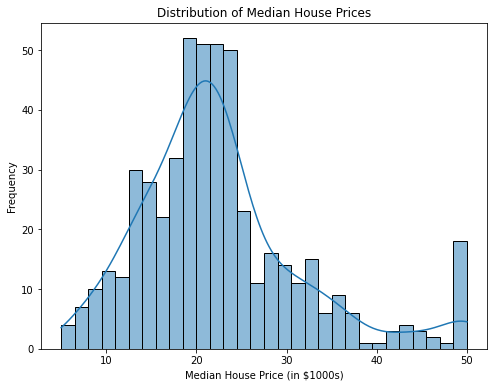

In [8]:
# Plot the distribution of the target variable (House Price)
plt.figure(figsize=(8, 6))
sns.histplot(df["MEDV"], bins=30, kde=True)
plt.title("Distribution of Median House Prices")
plt.xlabel("Median House Price (in $1000s)")
plt.ylabel("Frequency")
plt.show()

In [9]:
# Split data into features and target variable
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Preprocessing pipeline
numeric_features = X.select_dtypes(include=[np.number]).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

In [11]:
# Model definitions
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42, n_estimators=100)
}

In [12]:
# Training and evaluating models
results = {}
for model_name, model in models.items():
    # Create a pipeline that combines the preprocessor and the model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    
    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_mean = -cv_scores.mean()
    results[model_name] = {"Cross-Validation MAE": cv_mean}
    
    # Fit the model and evaluate on the test set
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    results[model_name]["Test MAE"] = mean_absolute_error(y_test, y_pred)
    results[model_name]["Test MSE"] = mean_squared_error(y_test, y_pred)
    results[model_name]["Test RMSE"] = np.sqrt(results[model_name]["Test MSE"])
    results[model_name]["Test MAPE"] = mean_absolute_percentage_error(y_test, y_pred)
    
    # Print results for each model
    print(f"Results for {model_name}:")
    print(f"  Cross-Validation MAE: {cv_mean:.2f}")
    print(f"  Test MAE: {results[model_name]['Test MAE']:.2f}")
    print(f"  Test MSE: {results[model_name]['Test MSE']:.2f}")
    print(f"  Test RMSE: {results[model_name]['Test RMSE']:.2f}")
    print(f"  Test MAPE: {results[model_name]['Test MAPE']:.2%}")
    print("------------------------------------------------------\n")

Results for Linear Regression:
  Cross-Validation MAE: 3.45
  Test MAE: 3.19
  Test MSE: 24.29
  Test RMSE: 4.93
  Test MAPE: 16.87%
------------------------------------------------------

Results for Random Forest Regressor:
  Cross-Validation MAE: 2.41
  Test MAE: 2.04
  Test MSE: 7.91
  Test RMSE: 2.81
  Test MAPE: 11.10%
------------------------------------------------------

Results for Gradient Boosting Regressor:
  Cross-Validation MAE: 2.32
  Test MAE: 1.91
  Test MSE: 6.21
  Test RMSE: 2.49
  Test MAPE: 10.06%
------------------------------------------------------



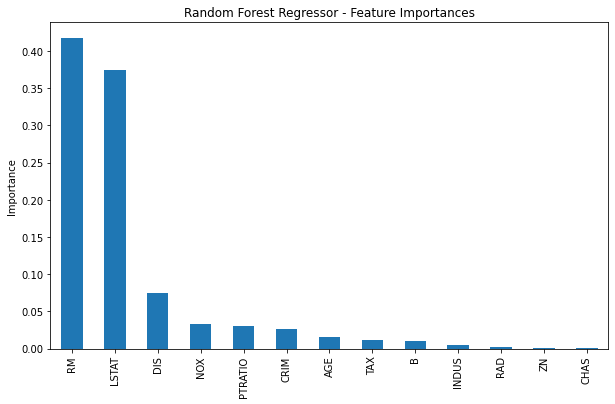

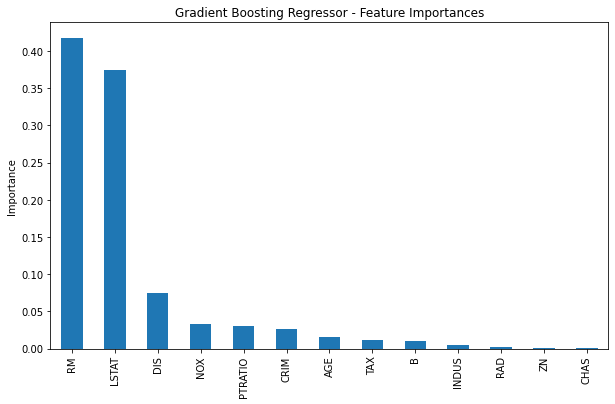

In [13]:
# Plotting feature importances for Random Forest and Gradient Boosting (if applicable)
for model_name, model in models.items():
    if hasattr(model, 'feature_importances_'):
        pipeline.fit(X_train, y_train)
        importances = pipeline.named_steps['model'].feature_importances_
        feature_importances = pd.Series(importances, index=numeric_features).sort_values(ascending=False)
        
        plt.figure(figsize=(10, 6))
        feature_importances.plot(kind='bar')
        plt.title(f"{model_name} - Feature Importances")
        plt.ylabel("Importance")
        plt.show()